# YouTube API 실습

**참고**

https://github.com/youtube/api-samples/tree/master/python

---


<details>
<summary> YouTube Data API로 할 수 있는 것들</summary>

**1. 채널/구독 관련**

Add a channel subscription (subscriptions.insert) → 특정 채널 구독하기

Add a featured video (channels.update) → 채널 대표 영상 설정

Post a channel bulletin (activities.insert) → 채널 커뮤니티에 게시물 올리기

Upload/Remove/Set watermark (watermarks.set, watermarks.unset) → 채널 워터마크 이미지 관리

Upload banner (channelBanners.insert, channels.update) → 채널 배너 이미지 바꾸기

Set localized channel metadata (channels.update/list) → 채널 이름·설명 다국어 버전 등록/조회

Set localized channel section metadata (channelSections.update/list) → 채널 섹션(재생목록 영역) 다국어 버전 등록/조회

Shuffle channel sections (channelSections.list/update) → 채널 섹션 순서 섞기/재배치

<br>

**2. 영상(Video) 관련**

Search by keyword (search.list) → 키워드로 영상/채널/재생목록 검색

Search by location (search.list, videos.list) → 특정 위치/반경 내 영상 검색

Like a video (videos.rate) → 영상 좋아요/싫어요 표시

Update a video (videos.update) → 영상 제목, 설명, 태그 등 수정

Upload a video (videos.insert) → 새 영상 업로드

Upload a video thumbnail (thumbnails.set) → 썸네일 이미지 업로드/교체

Set localized video metadata (videos.update/list) → 영상 제목·설명 다국어 버전 등록/조회

<br>

**3. 재생목록(Playlist) 관련**

Create a playlist (playlists.insert) → 새 재생목록 만들기

Retrieve my uploads (playlistItems.list) → 내 채널에 업로드된 영상 목록 가져오기

Set localized playlist metadata (playlists.update/list) → 재생목록 이름·설명 다국어 버전 등록/조회

<br>

**4. 댓글/자막 관련**

Create/manage comments (commentThreads.list, comments.insert, …) → 댓글 가져오기, 쓰기, 수정, 삭제, 스팸처리

Create/manage comment threads (commentThreads.insert/list/update) → 영상/채널의 최상위 댓글 관리

Create/manage captions (captions.insert/list/update/download/delete) → 자막 업로드, 수정, 다운로드, 삭제

<br>

**5. 라이브 방송 관련**

Create broadcast/stream (liveBroadcasts.insert, liveStreams.insert, liveBroadcasts.bind) → 유튜브 라이브 방송 및 스트림 생성·연결

Retrieve broadcasts (liveBroadcasts.list) → 채널의 방송 일정/목록 가져오기

Retrieve live streams (liveStreams.list) → 채널 라이브 스트림 설정 정보 가져오기

<br>

**6. 통계/리포트 관련**

Retrieve top 10 videos (youtubeAnalytics.reports.query) → 조회수 기준 상위 영상 10개와 통계 데이터

Create reporting job (youtubeReporting.jobs.create) → 주기적 리포트 생성 작업 등록

Retrieve reports (youtubeReporting.jobs.list, reports.list) → 생성된 리포트 파일 목록 및 다운로드 URL 가져오기

In [ ]:
from dotenv import load_dotenv
load_dotenv()
import os

YOUTUBE_API_KEY = os.getenv("YOUTUBE_API_KEY")
YOUTUBE_API_URL = "https://www.googleapis.com/youtube/v3"

<br>

## ✔️ Search by keyword

In [ ]:
# 지정된 검색어에 대한 검색 요청을 실행합니다.
# 참고 : 이 코드를 실행하기 위해서는 개발자 키를 발급해야 합니다.
# API 및 인증 > 등록된 앱의 API 키 값
# 여기서 API 키를 발급 받으세요. https://cloud.google.com/console
# 프로젝트에 YouTube Data API를 활성화했는지 확인하세요.
# Google API 콘솔에서 "REPLACE_ME"를 검색하여 발급 받은 개발자 키를 넣으세요.

import argparse
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError

DEVELOPER_KEY = YOUTUBE_API_KEY
YOUTUBE_API_SERVICE_NAME = 'youtube'
YOUTUBE_API_VERSION = 'v3'

def youtube_search(options):
  youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION,
    developerKey=DEVELOPER_KEY)

  # 지정된 것과 일치하는 결과를 검색하기 위해 search.list 메서드를 호출합니다.
  # search().list()에 넣을 수 있는 값들:
  # "date" → 최신순
  # "rating" → 평점순
  # "relevance" → 정확도순 (기본값)
  # "title" → 제목 알파벳순
  # "videoCount" → 채널 동영상 수 많은 순
  # "viewCount" → 조회수 많은 순
  search_response = youtube.search().list(
    q=options.q,
    part='id,snippet',
    maxResults=options.max_results,
    order="viewCount"
  ).execute()

  videos = []

  # 각 결과를 적절한 목록에 추가한 다음 목록을 표시합니다.
  # 일치하는 비디오, 채널 및 재생 목록
  for search_result in search_response.get('items', []):
    if search_result['id']['kind'] == 'youtube#video':
        vid = search_result['id']['videoId']
        title = search_result['snippet']['title']
        url = f"https://www.youtube.com/watch?v={vid}"
        videos.append(f"{title} | {url}")

  print("\n".join(videos))

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument('--q', help='Search term', default='Google')
parser.add_argument('--max-results', type=int, help='Max results', default=25)

args = parser.parse_args([])

args.q = "kpop"
args.max_results = 10

try:
  youtube_search(args)
except HttpError as e:
  print('An HTTP error %d occurred:\n%s' % (e.resp.status, e.content))

<br>

## ✔️ Search by location

In [ ]:
import argparse
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError

DEVELOPER_KEY = YOUTUBE_API_KEY
YOUTUBE_API_SERVICE_NAME = 'youtube'
YOUTUBE_API_VERSION = 'v3'

def youtube_search(options):
    youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION,
                    developerKey=DEVELOPER_KEY)

    # 검색 (위치 기반)
    # 지정된 것과 일치하는 결과를 검색하기 위해 search.list 메서드를 호출합니다.
    # search().list()에 넣을 수 있는 값들:
    # "date" → 최신순
    # "rating" → 평점순
    # "relevance" → 정확도순 (기본값)
    # "title" → 제목 알파벳순
    # "videoCount" → 채널 동영상 수 많은 순
    # "viewCount" → 조회수 많은 순
    search_response = youtube.search().list(
        q=options.q,
        type='video',
        location=options.location,
        locationRadius=options.location_radius,
        part='id,snippet',
        maxResults=options.max_results
    ).execute()

    search_videos = [item['id']['videoId'] for item in search_response.get('items', [])]
    video_ids = ','.join(search_videos)

    # 영상 상세정보 조회 (위치 정보 포함)
    if video_ids:
        video_response = youtube.videos().list(
            id=video_ids,
            part='snippet,recordingDetails'
        ).execute()

        videos = []
        for video_result in video_response.get('items', []):
            title = video_result['snippet']['title']
            vid = video_result['id']
            loc = video_result.get('recordingDetails', {}).get('location')
            url = f"https://www.youtube.com/watch?v={vid}"
            if loc:
                videos.append(f"{title} | {url} | ({loc['latitude']},{loc['longitude']})")
            else:
                videos.append(f"{title} | {url} | (No location info)")

        print("Videos:\n", "\n".join(videos), "\n")
    else:
        print("No videos found for this query/location.")

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument('--q', help='Search term', default='Google')
parser.add_argument('--location', help='Location', default='37.42307,-122.08427')
parser.add_argument('--location-radius', help='Location radius', default='5km')
parser.add_argument('--max-results', type=int, help='Max results', default=25)

args = parser.parse_args([])

# 원하는 검색어/위치 직접 수정 가능
args.q = "스노클링"
args.location = "33.4996,126.5312"
args.location_radius = "10km"
args.max_results = 10

try:
    youtube_search(args)
except HttpError as e:
    print(f"An HTTP error {e.resp.status} occurred:\n{e.content}")

## ✔️ Get Comments

In [ ]:
import requests
import re

YOUTUBE_API_KEY = YOUTUBE_API_KEY
YOUTUBE_API_URL = "https://www.googleapis.com/youtube/v3"

def get_youtube_comments(video_url: str, max_results: int = 10) -> list:
    """유튜브 영상 댓글을 관련성 높은 순으로 가져옵니다."""
    video_id_match = re.search(r"(?:v=|\/)([0-9A-Za-z_-]{11}).*", video_url)
    if not video_id_match:
        raise ValueError("유효하지 않은 YouTube URL입니다.")
    video_id = video_id_match.group(1)
    
    comment_url = f"{YOUTUBE_API_URL}/commentThreads?part=snippet&videoId={video_id}&order=relevance&maxResults={max_results}&key={YOUTUBE_API_KEY}"
    response = requests.get(comment_url)
    data = response.json()
    
    comments = []
    for item in data.get('items', []):
        snippet = item['snippet']['topLevelComment']['snippet']
        comments.append({
            'author': snippet['authorDisplayName'],
            'text': snippet['textOriginal'],
            'likeCount': snippet.get('likeCount', 0),
            'publishedAt': snippet['publishedAt']
        })
    
    return comments

In [ ]:
video_url = "https://www.youtube.com/watch?v=SsGn-E67lX8"

comments = get_youtube_comments(video_url, max_results=10)
for c in comments:
    print(f"[{c['likeCount']}👍] {c['author']}: {c['text'][:100]}...")

## ✔️Like Video

In [ ]:
import json
import os
import requests
from urllib.parse import urlencode
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from google_auth_oauthlib.flow import InstalledAppFlow
from google.oauth2.credentials import Credentials

# 기본 설정
API_SERVICE_NAME = 'youtube'
API_VERSION = 'v3'
SCOPES = ['https://www.googleapis.com/auth/youtube.force-ssl']
RATINGS = ('like', 'dislike', 'none')
CLIENT_SECRET_FILE = "client_secret.json" # 현재 폴더에 저장되어 있어야 합니다.

GOOGLE_AUTH_URL = 'https://accounts.google.com/o/oauth2/v2/auth'
GOOGLE_TOKEN_URL = 'https://oauth2.googleapis.com/token'

# 인증 및 서비스 생성
def get_authenticated_service():
    """OAuth 인증 및 YouTube 서비스 객체 생성"""
    creds = None
    token_file = "token.json"

    if os.path.exists(token_file):
        creds = Credentials.from_authorized_user_file(token_file, SCOPES)

    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(requests.Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(CLIENT_SECRET_FILE, SCOPES)
            creds = flow.run_local_server(port=0)
        with open(token_file, "w") as token:
            token.write(creds.to_json())

    return build(API_SERVICE_NAME, API_VERSION, credentials=creds)

# 기능 함수
def extract_video_id(url_or_id: str):
    """URL에서 YouTube Video ID 추출"""
    url_or_id = url_or_id.strip()
    if "youtube.com/watch?v=" in url_or_id:
        return url_or_id.split("v=")[1].split("&")[0]
    elif "youtu.be/" in url_or_id:
        return url_or_id.split("youtu.be/")[1].split("?")[0]
    elif "youtube.com/embed/" in url_or_id:
        return url_or_id.split("/embed/")[1].split("?")[0]
    return url_or_id


def get_video_info(youtube, video_id):
    """비디오 정보 조회"""
    response = youtube.videos().list(part="snippet,statistics", id=video_id).execute()
    if not response["items"]:
        print("⚠️ 비디오를 찾을 수 없습니다.")
        return None

    video = response["items"][0]
    return {
        "title": video["snippet"]["title"],
        "channel": video["snippet"]["channelTitle"],
        "views": video["statistics"].get("viewCount", "N/A"),
        "likes": video["statistics"].get("likeCount", "N/A"),
    }


def rate_video(youtube, video_id, rating):
    """비디오 평가(like/dislike/none)"""
    try:
        youtube.videos().rate(id=video_id, rating=rating).execute()
        print(f"✅ '{video_id}' → '{rating}' 완료!")
    except HttpError as e:
        print(f"❌ 오류 발생 ({e.resp.status}): {e}")

In [ ]:
# 단일 비디오 평가 실행

# YouTube 서비스 인증
youtube = get_authenticated_service()

# 동영상 ID 또는 URL 입력
video_input = input("🎬 YouTube URL 또는 Video ID 입력: ").strip()
video_id = extract_video_id(video_input)

# 비디오 정보 표시
info = get_video_info(youtube, video_id)
if info:
    print(f"\n제목: {info['title']}")
    print(f"채널: {info['channel']}")
    print(f"조회수: {info['views']}")
    print(f"좋아요: {info['likes']}")

# 평가 선택
rating = input("\n평가 선택 (like/dislike/none): ").strip().lower()
if rating not in RATINGS:
    print("❌ 잘못된 입력입니다.")
else:
    rate_video(youtube, video_id, rating)

# youtube-transcript-api 실습

**참고**

https://pypi.org/project/youtube-transcript-api/#list-available-transcripts

---


YouTube 동영상의 자막과 타임스탬프를 받고 번역할 수 있는 파이썬 API입니다. 자동 생성된 자막에서도 작동합니다.

<br>

## ✔️ API 기본 사용법


How AI Could Empower Any Business | Andrew Ng | TED(https://www.youtube.com/watch?v=reUZRyXxUs4) 영상 자막을 전사해보겠습니다.

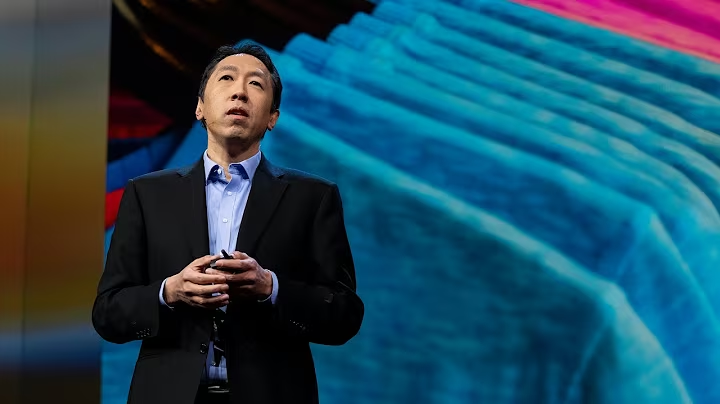

In [ ]:
from youtube_transcript_api import YouTubeTranscriptApi

ytt_api = YouTubeTranscriptApi()

In [ ]:
video_id = 'reUZRyXxUs4'

In [ ]:
fetched_transcript = ytt_api.fetch(video_id)

In [ ]:
for snippet in fetched_transcript:
    print(snippet.text)

# indexable
last_snippet = fetched_transcript[-1]

# provides a length
snippet_count = len(fetched_transcript)

In [ ]:
snippet_count

In [ ]:
raw_data = fetched_transcript.to_raw_data()
raw_data

<br>

## ✔️ 다양한 언어 가져오기

In [ ]:
transcript_list = ytt_api.list(video_id)

In [ ]:
print("이 영상에서 사용 가능한 자막 언어:")
for transcript in transcript_list:
    print(
        f"언어 이름: {transcript.language}, "
        f"언어 코드: {transcript.language_code}, "
        f"자동 생성 여부: {transcript.is_generated}"
    )

In [ ]:
ytt_api.fetch(video_id, languages=['ko', 'en'])
# ytt_api.fetch(video_id, languages=['ko'])
# ytt_api.fetch(video_id, languages=['ab', 'en'])

<br>

## ✔️ 자막 번역

In [ ]:
transcript = transcript_list.find_transcript(['en'])
translated_transcript = transcript.translate('de')
print(translated_transcript.fetch())

<br>

## ✔️ 포매터 활용

In [ ]:
from youtube_transcript_api.formatters import Formatter

from youtube_transcript_api.formatters import JSONFormatter
from youtube_transcript_api.formatters import PrettyPrintFormatter
from youtube_transcript_api.formatters import TextFormatter
from youtube_transcript_api.formatters import WebVTTFormatter
from youtube_transcript_api.formatters import SRTFormatter

In [ ]:
transcript = ytt_api.fetch(video_id)

In [ ]:
# formatter = JSONFormatter()
# formatter = PrettyPrintFormatter()
# formatter = TextFormatter()
# formatter = WebVTTFormatter()
formatter = SRTFormatter()

In [ ]:
formatted_transcript = formatter.format_transcript(transcript)
formatted_transcript